# Predator-Prey model

![predator-prey](../pics/predator-prey.png)
$\left\{
\begin{array}{l}
\dot{x} = \alpha x -\beta xy
\\
\dot{y} = -\gamma y + \delta xy
\end{array}
\right.$

In [1]:
# this makes sure it starts looking for things from the top folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\ode_to_odes


In [2]:
from ode_helpers import *

In [3]:
def f(t, y, c):
    ydot = [c[0]*y[0] -c[1]*y[0]*y[1],
        -c[2]*y[1] + c[3]*y[0]*y[1] ]
    return ydot

def dx_dt(x, y):
    return f(0, (x, y), c)[0]
    
def dy_dt(x, y):
    return f(0, (x, y), c)[1]

alpha=1
beta=1
gamma=1
delta=1
c = (alpha, beta, gamma, delta)

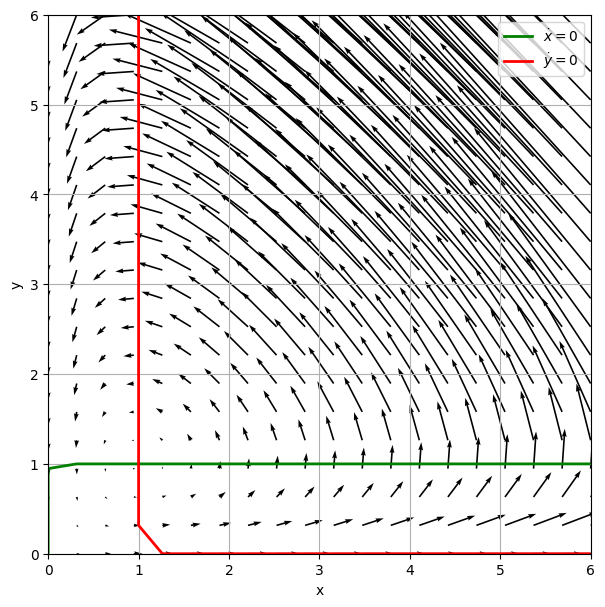

In [4]:
plot_phase_plane(dx_dt,
                 dy_dt,
                 x_range=(0, 6),
                 y_range=(0, 6),
                 density=20,
                 scale=10
                 # %trajectories=[(2, 0), (-2, 1), (0, -2)]
                 )

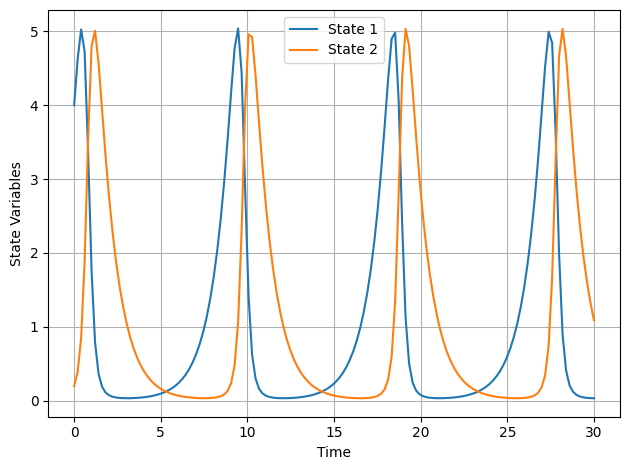

In [5]:
tspan = np.linspace(0, 30, 150)
yinit = [4, .2]     
sol = solve_ivp(lambda t,
                y: f(t, y, c),
                [tspan[0], tspan[-1]],
                yinit,
                t_eval=tspan,
                rtol = 1e-5)
#  Plot states
state_plotter(sol.t, sol.y)